In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
from tqdm.notebook import tqdm

In [2]:
samples_4mu = [
    "TTJets",
    
    "4mu_500GeV_5p0GeV_0p08mm",
    "4mu_500GeV_5p0GeV_0p8mm",
    "4mu_500GeV_5p0GeV_8p0mm",
    "4mu_500GeV_5p0GeV_40p0mm",
    "4mu_500GeV_5p0GeV_80p0mm",   
]

samples_2mu = [
    "TTJets",
    
    "2mu2e_500GeV_5p0GeV_0p08mm",
    "2mu2e_500GeV_5p0GeV_0p8mm",
    "2mu2e_500GeV_5p0GeV_8p0mm",
    "2mu2e_500GeV_5p0GeV_40p0mm",
    "2mu2e_500GeV_5p0GeV_80p0mm",   
]

In [3]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v2", max_files=1)
fileset_2mu = utilities.make_fileset(samples_2mu, "llpNanoAOD_v2", max_files=1)

runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
    #maxchunks=1,
)

channels = ["base"]
p = sidm_processor.SidmProcessor(
    channels,
    ["base"],
    lj_reco_choices=["0.4"],
    llpnanoaod=True,
)

output_4mu = runner.run(fileset_4mu, treename="Events", processor_instance=p)
output_2mu = runner.run(fileset_2mu, treename="Events", processor_instance=p)

out_4mu = output_4mu["out"]
out_2mu = output_2mu["out"]

Output()

Output()

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered 
in divide
  result = getattr(ufunc, method)(

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in
divide
  result = getattr(ufunc, method)(

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


Output()

Output()

In [6]:
BKG_4mu = out_4mu[samples_4mu[0]]["hists"]
SIG_1_4mu = out_4mu[samples_4mu[1]]["hists"]
SIG_2_4mu = out_4mu[samples_4mu[2]]["hists"]
SIG_3_4mu = out_4mu[samples_4mu[3]]["hists"]
SIG_4_4mu = out_4mu[samples_4mu[4]]["hists"]
SIG_5_4mu = out_4mu[samples_4mu[5]]["hists"]

BKG_2mu = out_2mu[samples_2mu[0]]["hists"]
SIG_1_2mu = out_2mu[samples_2mu[1]]["hists"]
SIG_2_2mu = out_2mu[samples_2mu[2]]["hists"]
SIG_3_2mu = out_2mu[samples_2mu[3]]["hists"]
SIG_4_2mu = out_2mu[samples_2mu[4]]["hists"]
SIG_5_2mu = out_2mu[samples_2mu[5]]["hists"]

Text(0.5, 1.0, '4Mu TTJets')

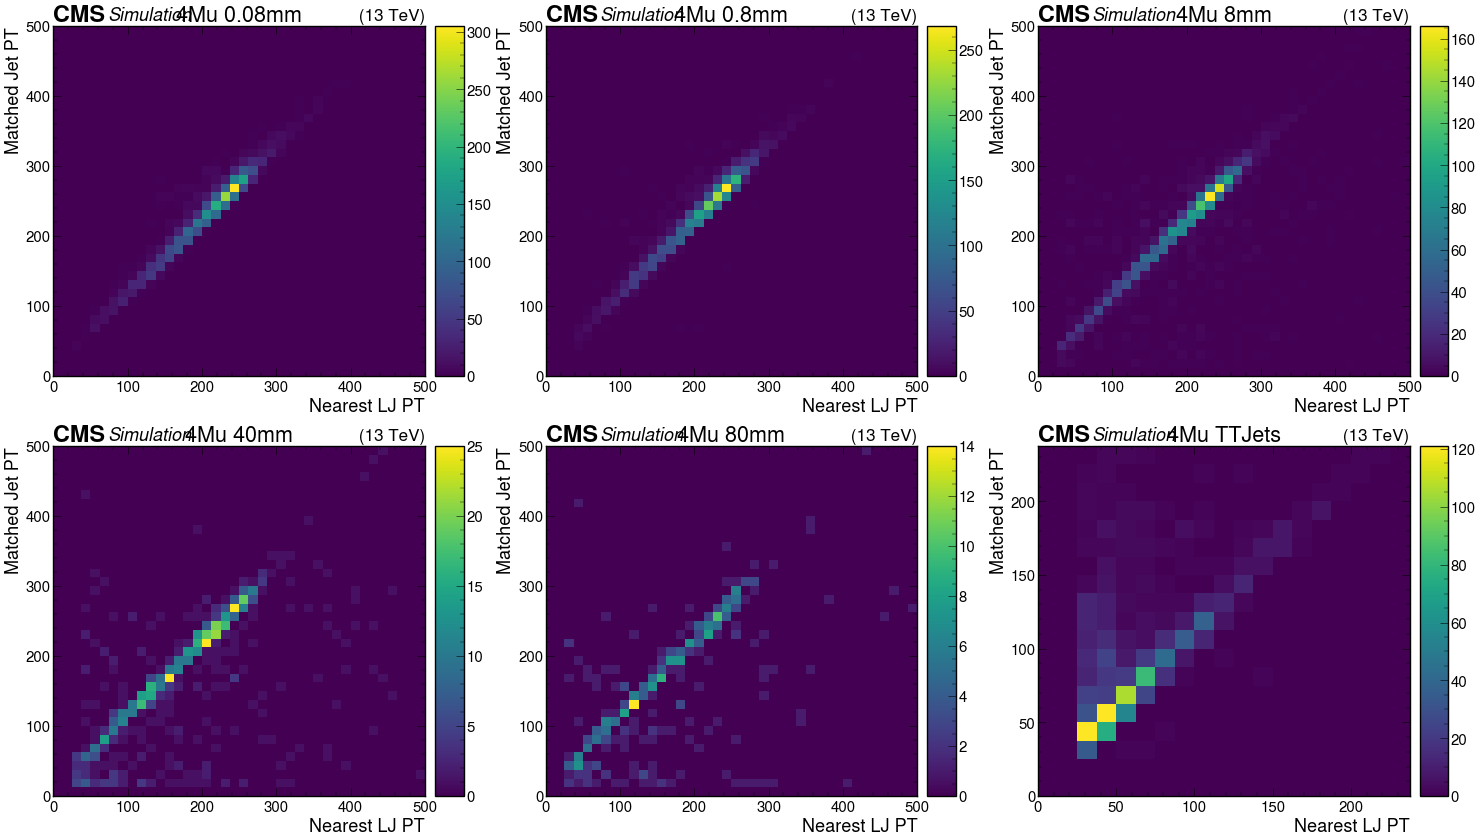

In [7]:
nplots = 3
plt.subplots(2, nplots, figsize=(nplots*12, 20))

plt.subplot(2, nplots, 1)
utilities.plot(SIG_1_4mu["LJ_matchedjet_PT"][channels[0], :, :], flow='none')
plt.title("4Mu 0.08mm")

plt.subplot(2, nplots, 2)
utilities.plot(SIG_2_4mu["LJ_matchedjet_PT"][channels[0], :, :], flow='none')
plt.title("4Mu 0.8mm")

plt.subplot(2, nplots, 3)
utilities.plot(SIG_3_4mu["LJ_matchedjet_PT"][channels[0], :, :], flow='none')
plt.title("4Mu 8mm")

plt.subplot(2, nplots, 4)
utilities.plot(SIG_4_4mu["LJ_matchedjet_PT"][channels[0], :, :], flow='none')
plt.title("4Mu 40mm")

plt.subplot(2, nplots, 5)
utilities.plot(SIG_5_4mu["LJ_matchedjet_PT"][channels[0], :, :], flow='none')
plt.title("4Mu 80mm")

plt.subplot(2, nplots, 6)
utilities.plot(BKG_4mu["LJ_matchedjet_PT"][channels[0], :240j, :240j], flow='none')
plt.title("4Mu TTJets")

Text(0.5, 1.0, '2Mu TTJets')

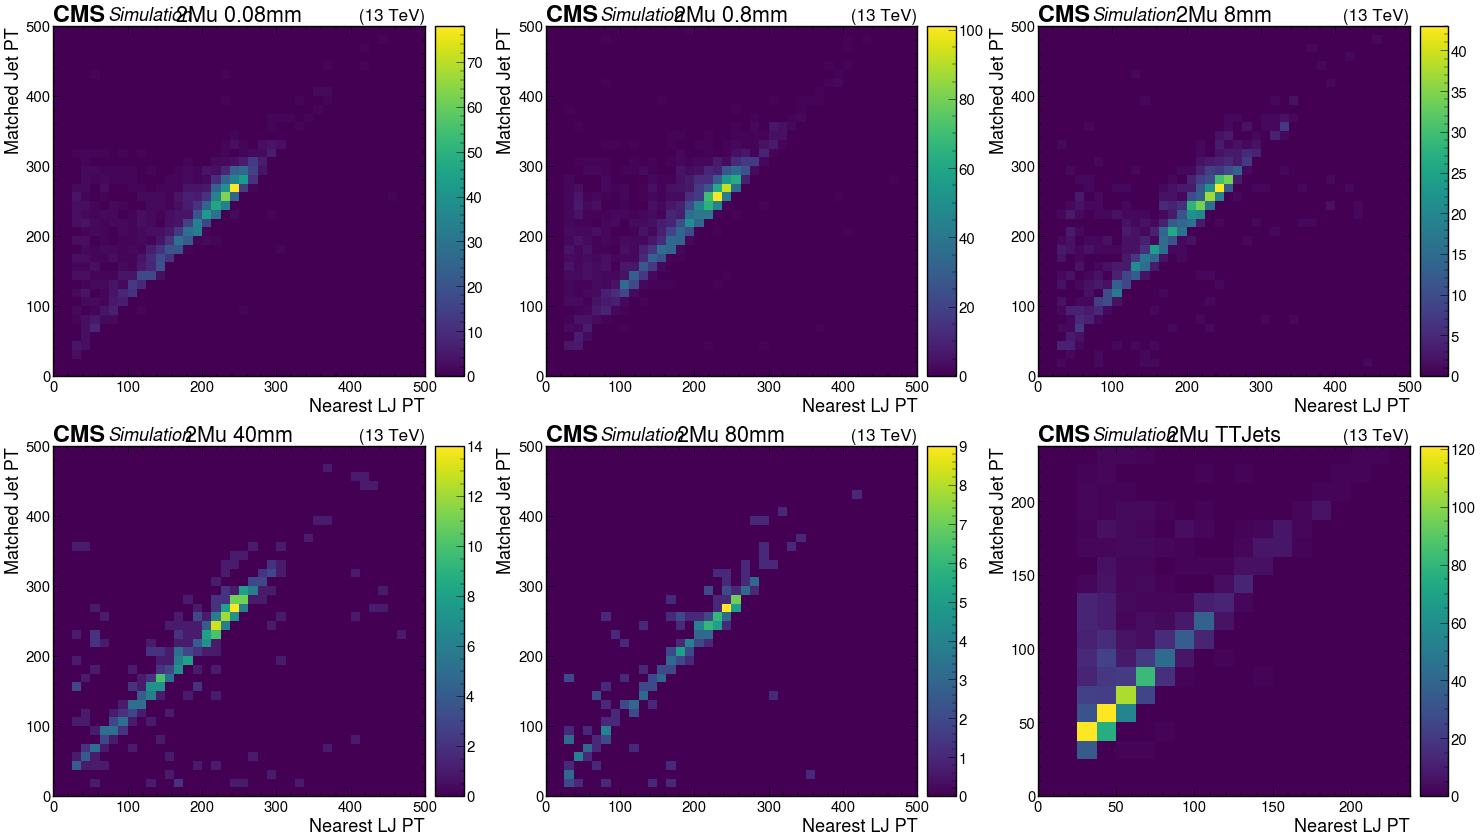

In [8]:
nplots = 3
plt.subplots(2, nplots, figsize=(nplots*12, 20))

plt.subplot(2, nplots, 1)
utilities.plot(SIG_1_2mu["LJ_matchedjet_PT"][channels[0], :, :], flow='none')
plt.title("2Mu 0.08mm")

plt.subplot(2, nplots, 2)
utilities.plot(SIG_2_2mu["LJ_matchedjet_PT"][channels[0], :, :], flow='none')
plt.title("2Mu 0.8mm")

plt.subplot(2, nplots, 3)
utilities.plot(SIG_3_2mu["LJ_matchedjet_PT"][channels[0], :, :], flow='none')
plt.title("2Mu 8mm")

plt.subplot(2, nplots, 4)
utilities.plot(SIG_4_2mu["LJ_matchedjet_PT"][channels[0], :, :], flow='none')
plt.title("2Mu 40mm")

plt.subplot(2, nplots, 5)
utilities.plot(SIG_5_2mu["LJ_matchedjet_PT"][channels[0], :, :], flow='none')
plt.title("2Mu 80mm")

plt.subplot(2, nplots, 6)
utilities.plot(BKG_2mu["LJ_matchedjet_PT"][channels[0], :240j, :240j], flow='none')
plt.title("2Mu TTJets")

Text(0.5, 1.0, '4Mu TTJets')

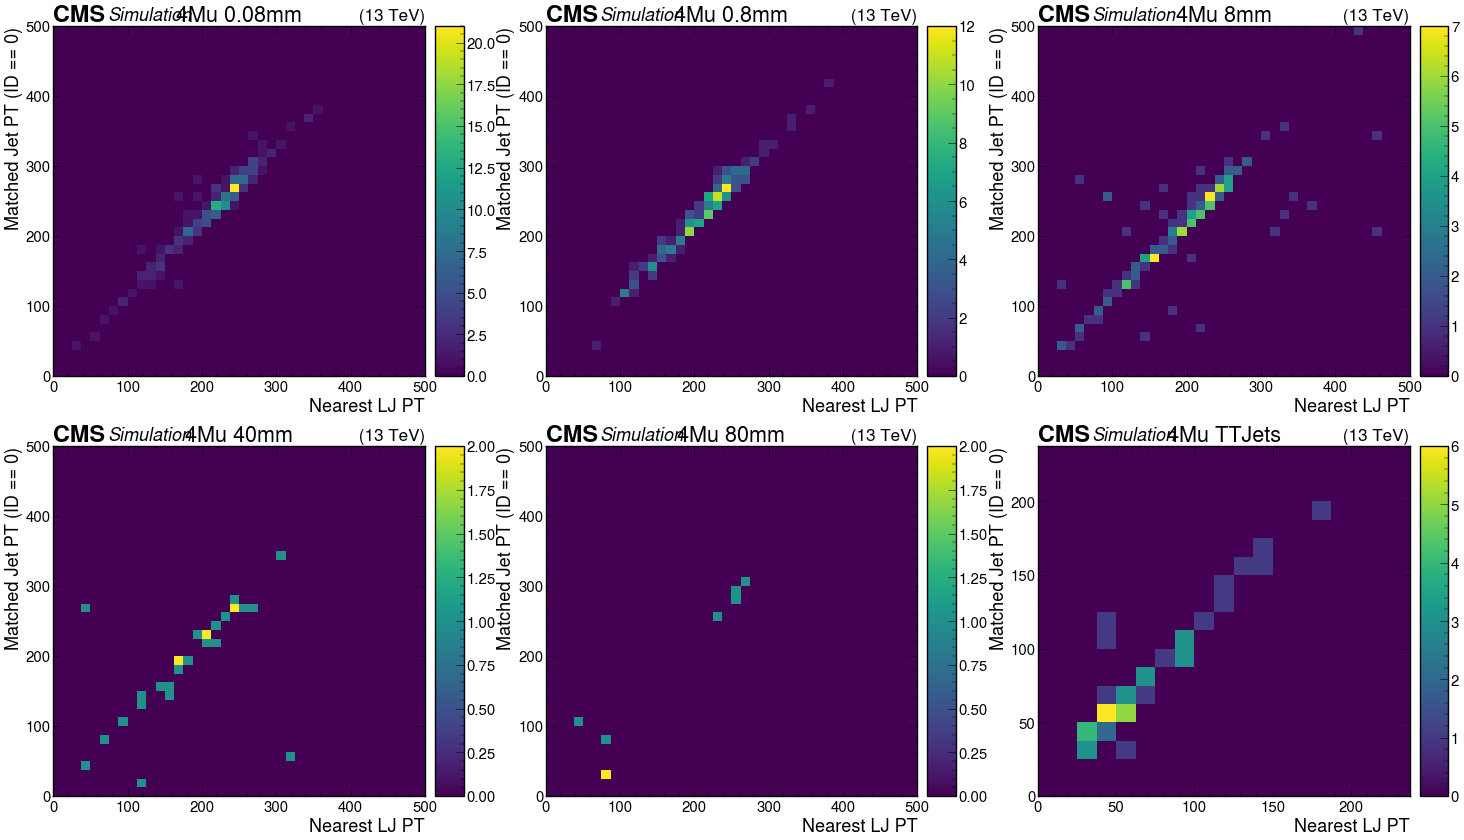

In [9]:
nplots = 3
plt.subplots(2, nplots, figsize=(nplots*12, 20))

plt.subplot(2, nplots, 1)
utilities.plot(SIG_1_4mu["LJ_matchedjet_PT0"][channels[0], :, :], flow='none')
plt.title("4Mu 0.08mm")

plt.subplot(2, nplots, 2)
utilities.plot(SIG_2_4mu["LJ_matchedjet_PT0"][channels[0], :, :], flow='none')
plt.title("4Mu 0.8mm")

plt.subplot(2, nplots, 3)
utilities.plot(SIG_3_4mu["LJ_matchedjet_PT0"][channels[0], :, :], flow='none')
plt.title("4Mu 8mm")

plt.subplot(2, nplots, 4)
utilities.plot(SIG_4_4mu["LJ_matchedjet_PT0"][channels[0], :, :], flow='none')
plt.title("4Mu 40mm")

plt.subplot(2, nplots, 5)
utilities.plot(SIG_5_4mu["LJ_matchedjet_PT0"][channels[0], :, :], flow='none')
plt.title("4Mu 80mm")

plt.subplot(2, nplots, 6)
utilities.plot(BKG_4mu["LJ_matchedjet_PT0"][channels[0], :240j, :240j], flow='none')
plt.title("4Mu TTJets")

Text(0.5, 1.0, '2Mu TTJets')

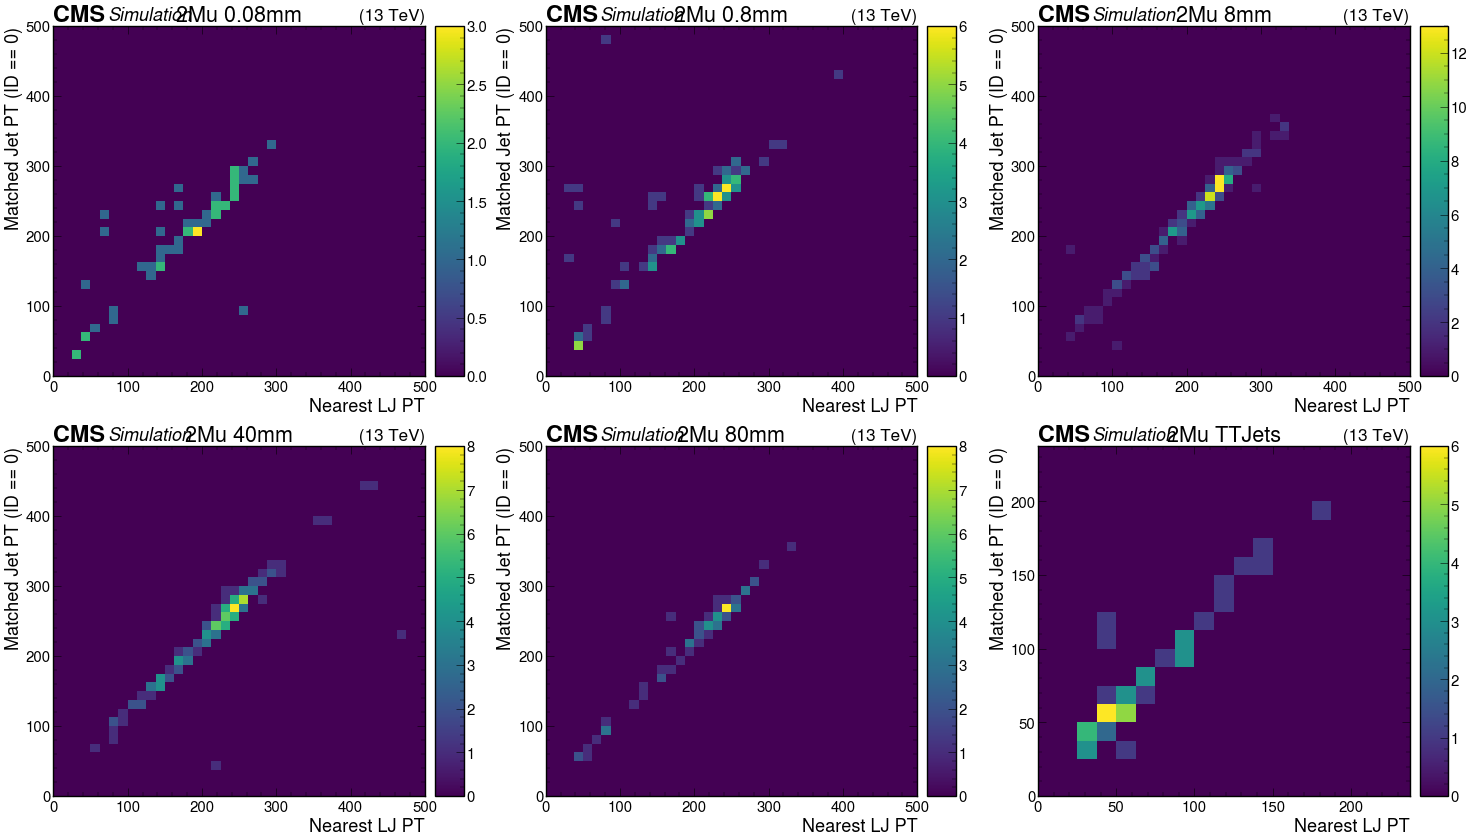

In [10]:
nplots = 3
plt.subplots(2, nplots, figsize=(nplots*12, 20))

plt.subplot(2, nplots, 1)
utilities.plot(SIG_1_2mu["LJ_matchedjet_PT0"][channels[0], :, :], flow='none')
plt.title("2Mu 0.08mm")

plt.subplot(2, nplots, 2)
utilities.plot(SIG_2_2mu["LJ_matchedjet_PT0"][channels[0], :, :], flow='none')
plt.title("2Mu 0.8mm")

plt.subplot(2, nplots, 3)
utilities.plot(SIG_3_2mu["LJ_matchedjet_PT0"][channels[0], :, :], flow='none')
plt.title("2Mu 8mm")

plt.subplot(2, nplots, 4)
utilities.plot(SIG_4_2mu["LJ_matchedjet_PT0"][channels[0], :, :], flow='none')
plt.title("2Mu 40mm")

plt.subplot(2, nplots, 5)
utilities.plot(SIG_5_2mu["LJ_matchedjet_PT0"][channels[0], :, :], flow='none')
plt.title("2Mu 80mm")

plt.subplot(2, nplots, 6)
utilities.plot(BKG_2mu["LJ_matchedjet_PT0"][channels[0], :240j, :240j], flow='none')
plt.title("2Mu TTJets")

Text(0.5, 1.0, '4Mu TTJets')

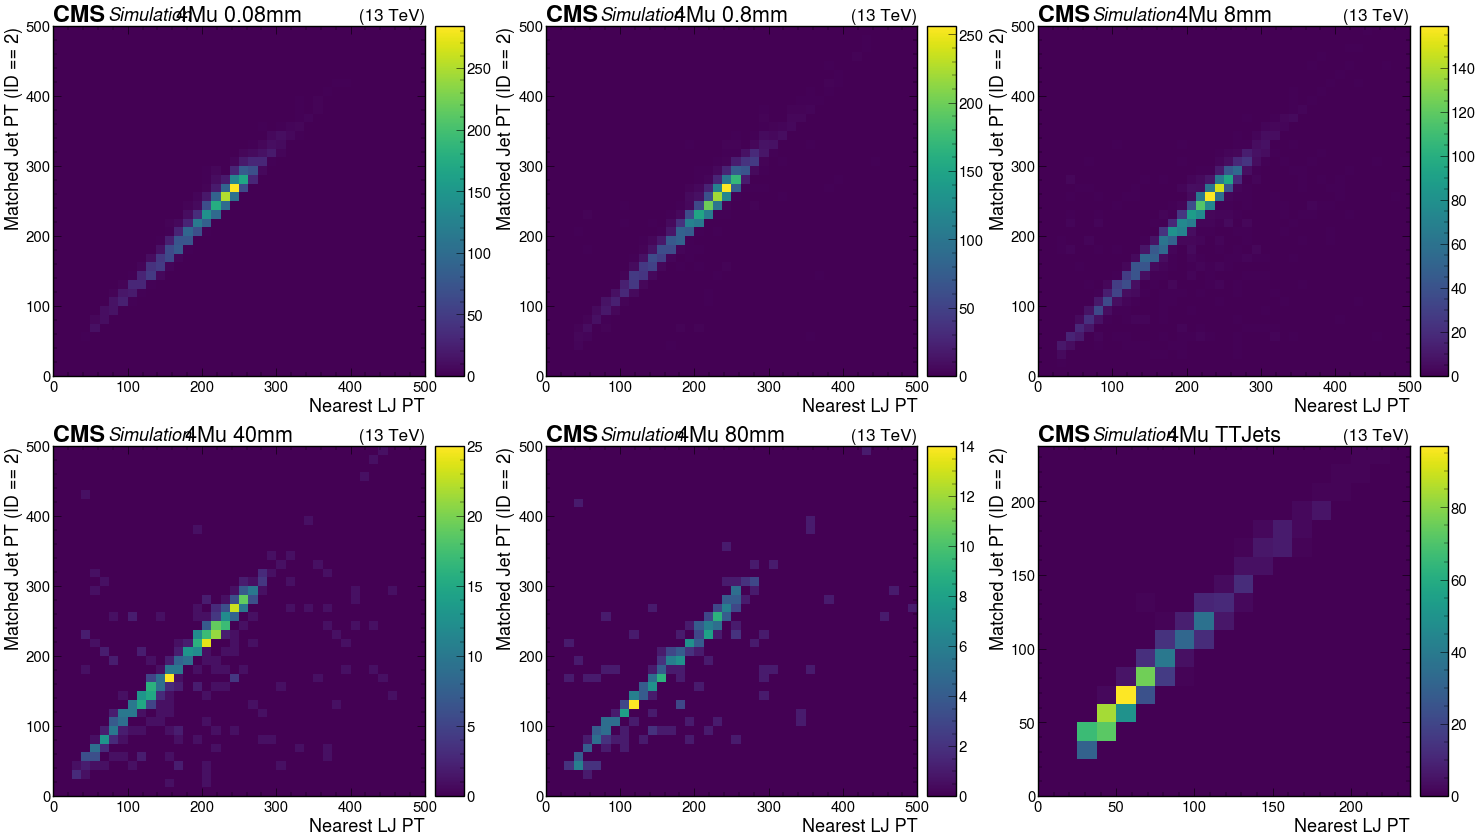

In [11]:
nplots = 3
plt.subplots(2, nplots, figsize=(nplots*12, 20))

plt.subplot(2, nplots, 1)
utilities.plot(SIG_1_4mu["LJ_matchedjet_PT2"][channels[0], :, :], flow='none')
plt.title("4Mu 0.08mm")

plt.subplot(2, nplots, 2)
utilities.plot(SIG_2_4mu["LJ_matchedjet_PT2"][channels[0], :, :], flow='none')
plt.title("4Mu 0.8mm")

plt.subplot(2, nplots, 3)
utilities.plot(SIG_3_4mu["LJ_matchedjet_PT2"][channels[0], :, :], flow='none')
plt.title("4Mu 8mm")

plt.subplot(2, nplots, 4)
utilities.plot(SIG_4_4mu["LJ_matchedjet_PT2"][channels[0], :, :], flow='none')
plt.title("4Mu 40mm")

plt.subplot(2, nplots, 5)
utilities.plot(SIG_5_4mu["LJ_matchedjet_PT2"][channels[0], :, :], flow='none')
plt.title("4Mu 80mm")

plt.subplot(2, nplots, 6)
utilities.plot(BKG_4mu["LJ_matchedjet_PT2"][channels[0], :240j, :240j], flow='none')
plt.title("4Mu TTJets")

Text(0.5, 1.0, '2Mu TTJets')

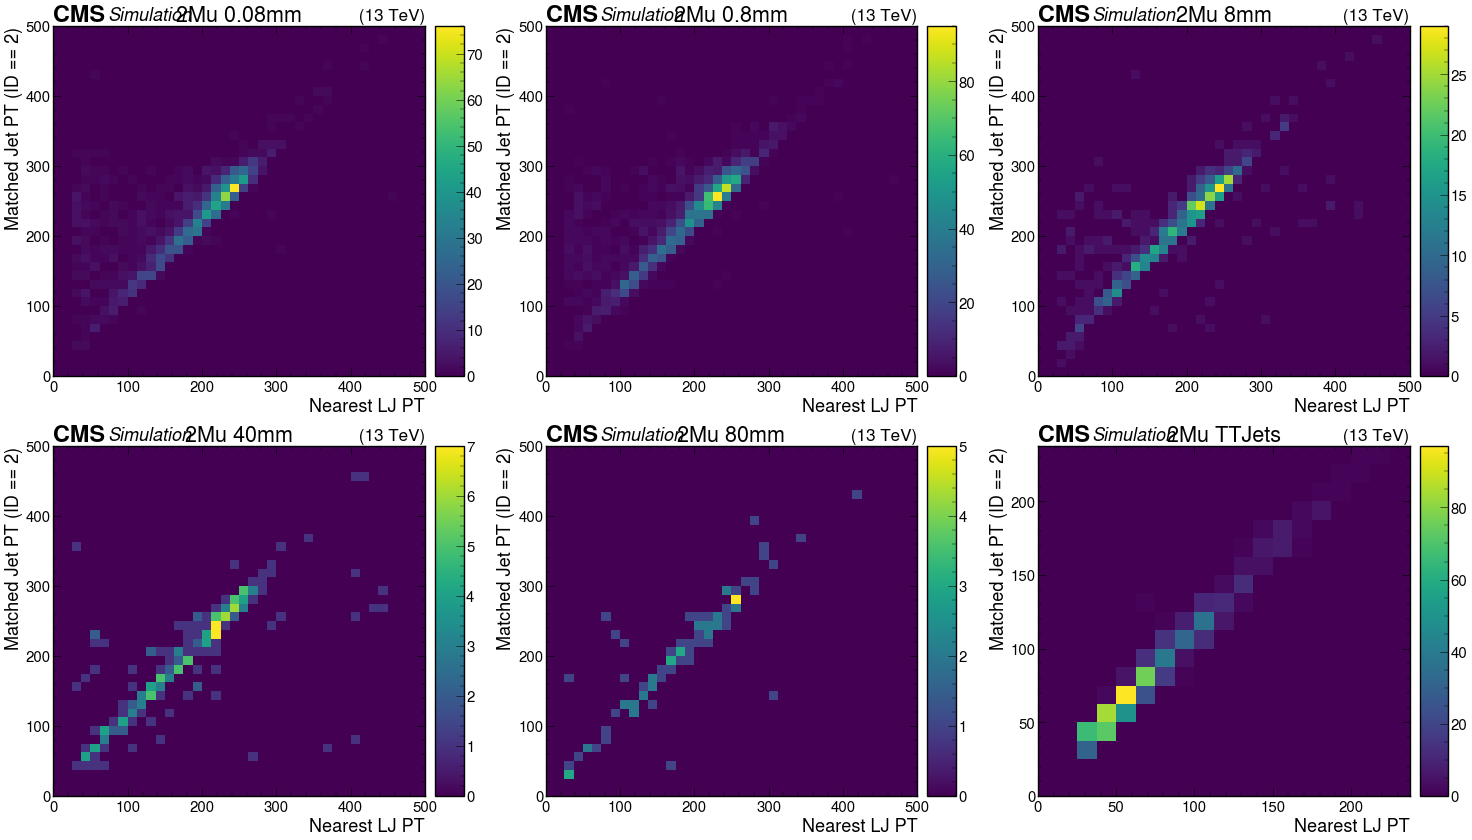

In [12]:
nplots = 3
plt.subplots(2, nplots, figsize=(nplots*12, 20))

plt.subplot(2, nplots, 1)
utilities.plot(SIG_1_2mu["LJ_matchedjet_PT2"][channels[0], :, :], flow='none')
plt.title("2Mu 0.08mm")

plt.subplot(2, nplots, 2)
utilities.plot(SIG_2_2mu["LJ_matchedjet_PT2"][channels[0], :, :], flow='none')
plt.title("2Mu 0.8mm")

plt.subplot(2, nplots, 3)
utilities.plot(SIG_3_2mu["LJ_matchedjet_PT2"][channels[0], :, :], flow='none')
plt.title("2Mu 8mm")

plt.subplot(2, nplots, 4)
utilities.plot(SIG_4_2mu["LJ_matchedjet_PT2"][channels[0], :, :], flow='none')
plt.title("2Mu 40mm")

plt.subplot(2, nplots, 5)
utilities.plot(SIG_5_2mu["LJ_matchedjet_PT2"][channels[0], :, :], flow='none')
plt.title("2Mu 80mm")

plt.subplot(2, nplots, 6)
utilities.plot(BKG_2mu["LJ_matchedjet_PT2"][channels[0], :240j, :240j], flow='none')
plt.title("2Mu TTJets")

Text(0.5, 1.0, '4Mu TTJets')

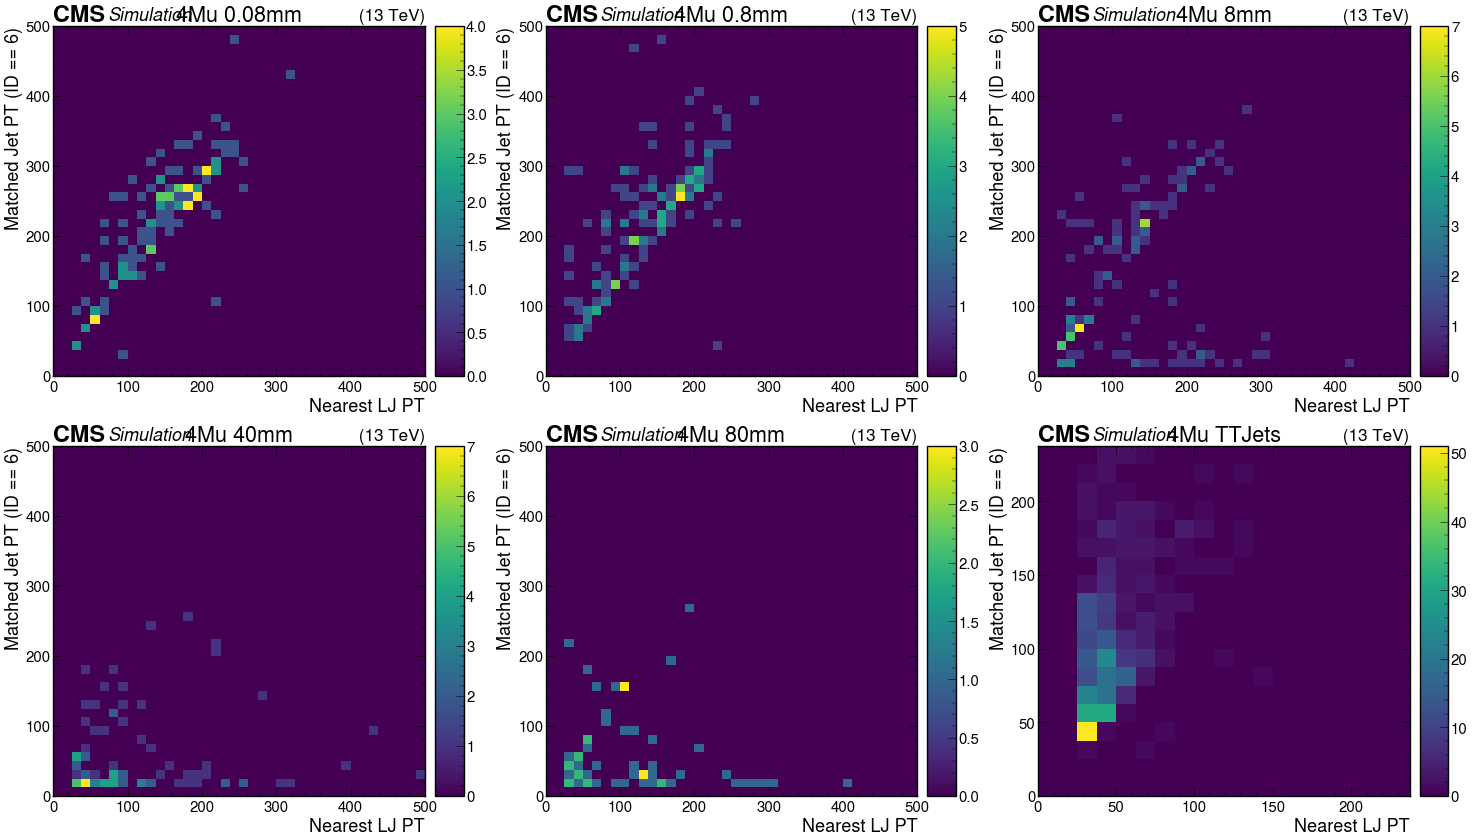

In [13]:
nplots = 3
plt.subplots(2, nplots, figsize=(nplots*12, 20))

plt.subplot(2, nplots, 1)
utilities.plot(SIG_1_4mu["LJ_matchedjet_PT6"][channels[0], :, :], flow='none')
plt.title("4Mu 0.08mm")

plt.subplot(2, nplots, 2)
utilities.plot(SIG_2_4mu["LJ_matchedjet_PT6"][channels[0], :, :], flow='none')
plt.title("4Mu 0.8mm")

plt.subplot(2, nplots, 3)
utilities.plot(SIG_3_4mu["LJ_matchedjet_PT6"][channels[0], :, :], flow='none')
plt.title("4Mu 8mm")

plt.subplot(2, nplots, 4)
utilities.plot(SIG_4_4mu["LJ_matchedjet_PT6"][channels[0], :, :], flow='none')
plt.title("4Mu 40mm")

plt.subplot(2, nplots, 5)
utilities.plot(SIG_5_4mu["LJ_matchedjet_PT6"][channels[0], :, :], flow='none')
plt.title("4Mu 80mm")

plt.subplot(2, nplots, 6)
utilities.plot(BKG_4mu["LJ_matchedjet_PT6"][channels[0], :240j, :240j], flow='none')
plt.title("4Mu TTJets")

Text(0.5, 1.0, '2Mu TTJets')

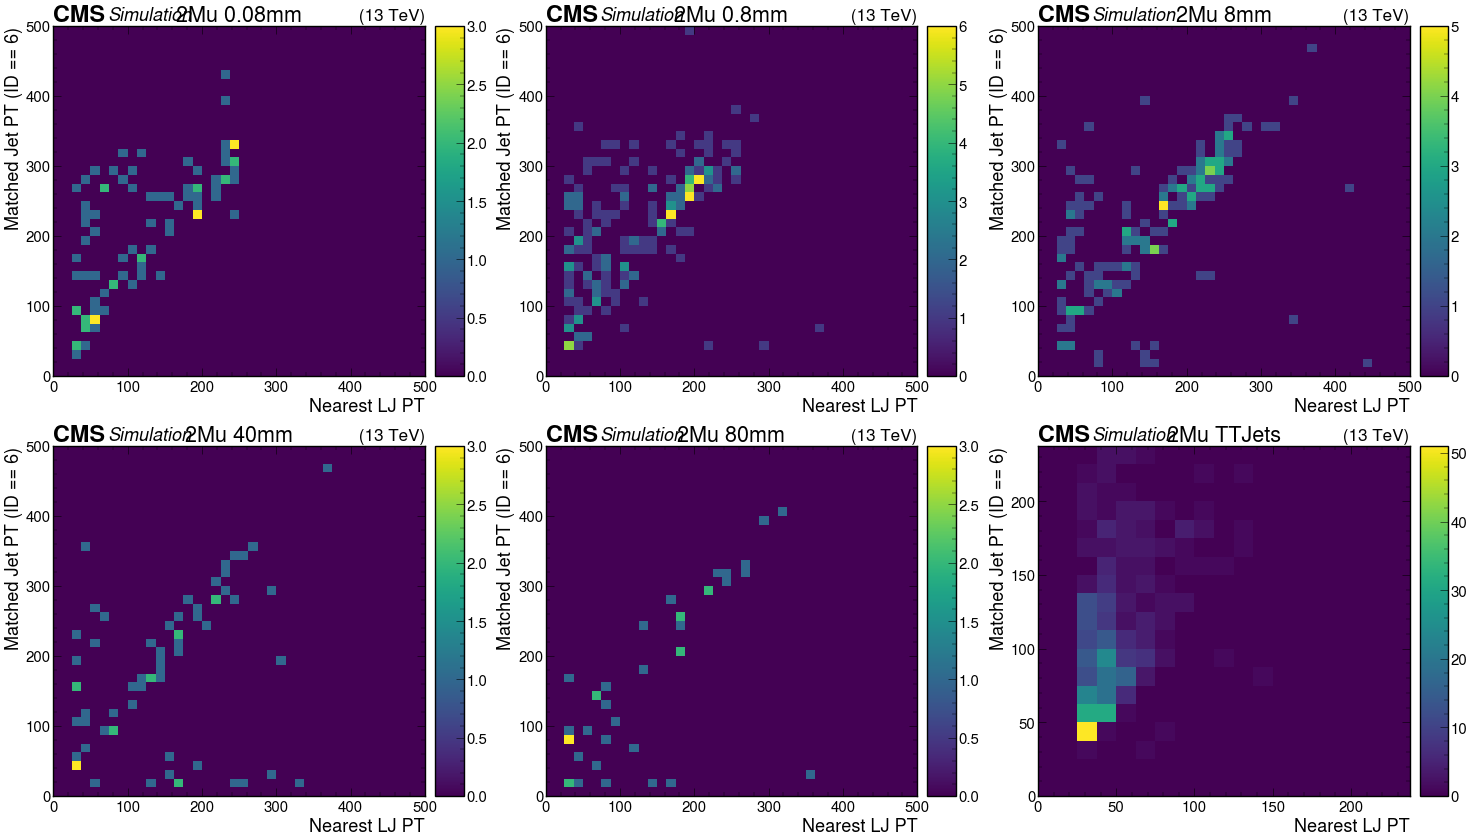

In [14]:
nplots = 3
plt.subplots(2, nplots, figsize=(nplots*12, 20))

plt.subplot(2, nplots, 1)
utilities.plot(SIG_1_2mu["LJ_matchedjet_PT6"][channels[0], :, :], flow='none')
plt.title("2Mu 0.08mm")

plt.subplot(2, nplots, 2)
utilities.plot(SIG_2_2mu["LJ_matchedjet_PT6"][channels[0], :, :], flow='none')
plt.title("2Mu 0.8mm")

plt.subplot(2, nplots, 3)
utilities.plot(SIG_3_2mu["LJ_matchedjet_PT6"][channels[0], :, :], flow='none')
plt.title("2Mu 8mm")

plt.subplot(2, nplots, 4)
utilities.plot(SIG_4_2mu["LJ_matchedjet_PT6"][channels[0], :, :], flow='none')
plt.title("2Mu 40mm")

plt.subplot(2, nplots, 5)
utilities.plot(SIG_5_2mu["LJ_matchedjet_PT6"][channels[0], :, :], flow='none')
plt.title("2Mu 80mm")

plt.subplot(2, nplots, 6)
utilities.plot(BKG_2mu["LJ_matchedjet_PT6"][channels[0], :240j, :240j], flow='none')
plt.title("2Mu TTJets")

In [16]:
eff_hist_bkg_0_4mu, errors_bkg_0_4mu = utilities.get_eff_hist(BKG_4mu["LJ_matchedjet_PT0"]['base',:240j,:240j], BKG_4mu["LJ_matchedjet_PT"]['base',:240j,:240j])
eff_hist_sig1_0_4mu, errors_sig1_0_4mu = utilities.get_eff_hist(SIG_1_4mu["LJ_matchedjet_PT0"]['base',:,:], SIG_1_4mu["LJ_matchedjet_PT"]['base',:,:])
eff_hist_sig2_0_4mu, errors_sig2_0_4mu = utilities.get_eff_hist(SIG_2_4mu["LJ_matchedjet_PT0"]['base',:,:], SIG_2_4mu["LJ_matchedjet_PT"]['base',:,:])
eff_hist_sig3_0_4mu, errors_sig3_0_4mu = utilities.get_eff_hist(SIG_3_4mu["LJ_matchedjet_PT0"]['base',:,:], SIG_3_4mu["LJ_matchedjet_PT"]['base',:,:])
eff_hist_sig4_0_4mu, errors_sig4_0_4mu = utilities.get_eff_hist(SIG_4_4mu["LJ_matchedjet_PT0"]['base',:,:], SIG_4_4mu["LJ_matchedjet_PT"]['base',:,:])
eff_hist_sig5_0_4mu, errors_sig5_0_4mu = utilities.get_eff_hist(SIG_5_4mu["LJ_matchedjet_PT0"]['base',:,:], SIG_5_4mu["LJ_matchedjet_PT"]['base',:,:])

eff_hist_bkg_0_2mu, errors_bkg_0_2mu = utilities.get_eff_hist(BKG_2mu["LJ_matchedjet_PT0"]['base',:240j,:240j], BKG_2mu["LJ_matchedjet_PT"]['base',:240j,:240j])
eff_hist_sig1_0_2mu, errors_sig1_0_2mu = utilities.get_eff_hist(SIG_1_2mu["LJ_matchedjet_PT0"]['base',:,:], SIG_1_2mu["LJ_matchedjet_PT"]['base',:,:])
eff_hist_sig2_0_2mu, errors_sig2_0_2mu = utilities.get_eff_hist(SIG_2_2mu["LJ_matchedjet_PT0"]['base',:,:], SIG_2_2mu["LJ_matchedjet_PT"]['base',:,:])
eff_hist_sig3_0_2mu, errors_sig3_0_2mu = utilities.get_eff_hist(SIG_3_2mu["LJ_matchedjet_PT0"]['base',:,:], SIG_3_2mu["LJ_matchedjet_PT"]['base',:,:])
eff_hist_sig4_0_2mu, errors_sig4_0_2mu = utilities.get_eff_hist(SIG_4_2mu["LJ_matchedjet_PT0"]['base',:,:], SIG_4_2mu["LJ_matchedjet_PT"]['base',:,:])
eff_hist_sig5_0_2mu, errors_sig5_0_2mu = utilities.get_eff_hist(SIG_5_2mu["LJ_matchedjet_PT0"]['base',:,:], SIG_5_2mu["LJ_matchedjet_PT"]['base',:,:])

Text(0.5, 1.0, '4mu TTJets')

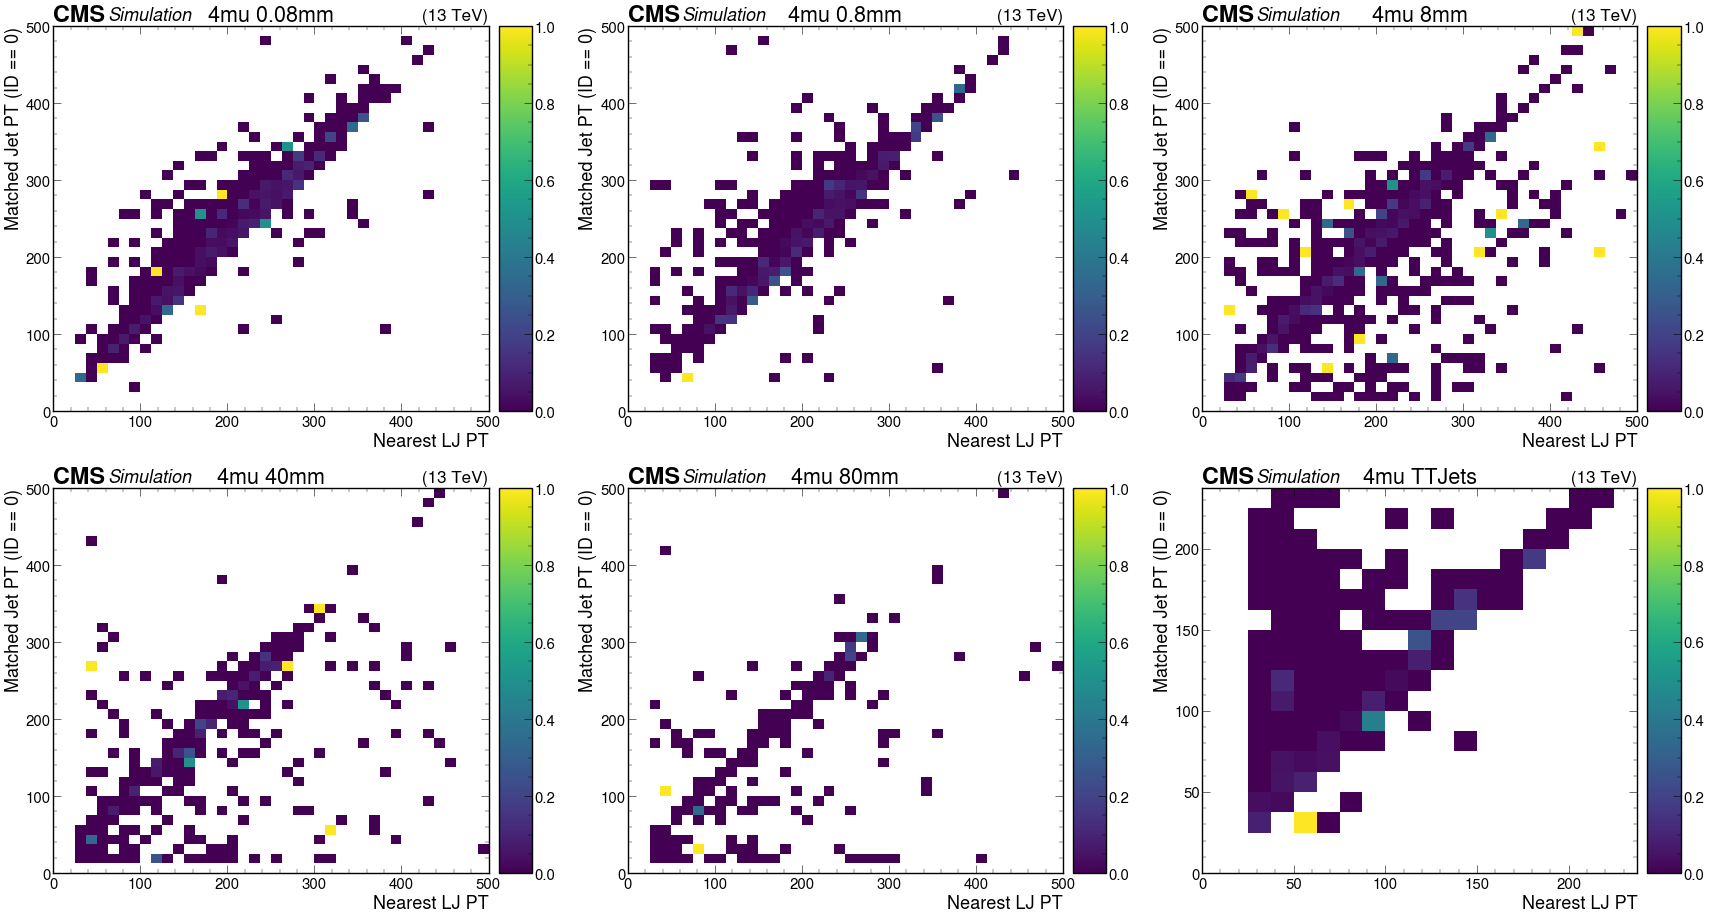

In [18]:
nplots = 3
plt.subplots(2, nplots, figsize=(nplots*14, 22))

plt.subplot(2, nplots, 1)
utilities.plot(eff_hist_sig1_0_4mu)
plt.title("4mu 0.08mm")

plt.subplot(2, nplots, 2)
utilities.plot(eff_hist_sig2_0_4mu)
plt.title("4mu 0.8mm")

plt.subplot(2, nplots, 3)
utilities.plot(eff_hist_sig3_0_4mu)
plt.title("4mu 8mm")

plt.subplot(2, nplots, 4)
utilities.plot(eff_hist_sig4_0_4mu)
plt.title("4mu 40mm")

plt.subplot(2, nplots, 5)
utilities.plot(eff_hist_sig5_0_4mu)
plt.title("4mu 80mm")

plt.subplot(2, nplots, 6)
utilities.plot(eff_hist_bkg_0_4mu)
plt.title("4mu TTJets")

Text(0.5, 1.0, '2mu TTJets')

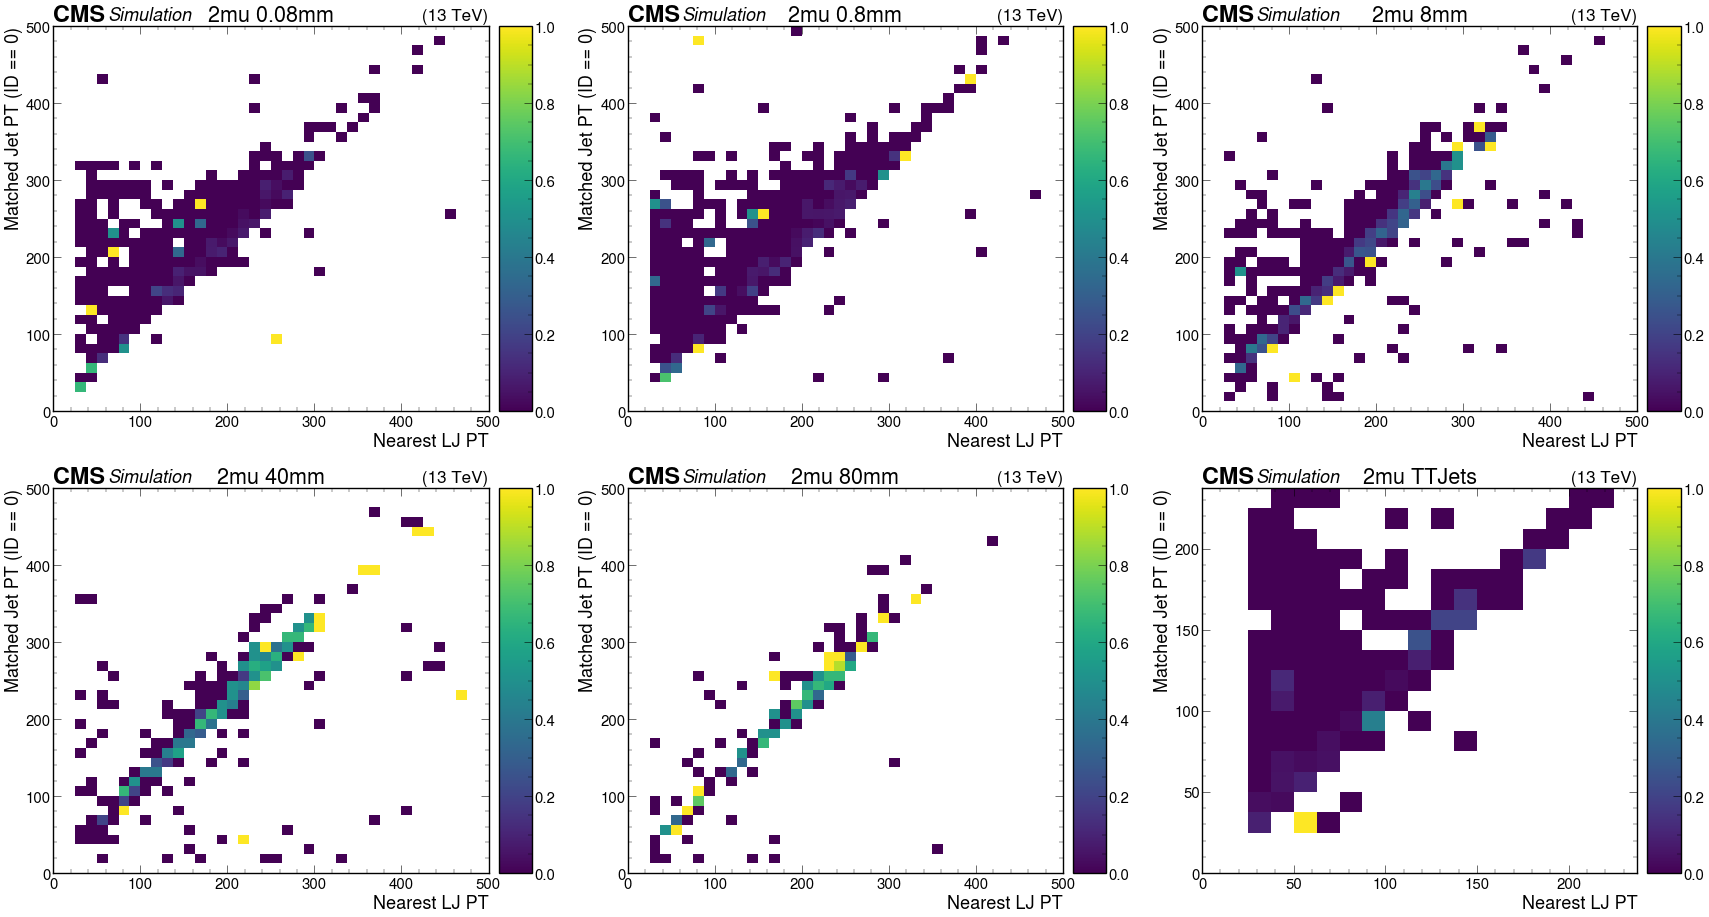

In [19]:
nplots = 3
plt.subplots(2, nplots, figsize=(nplots*14, 22))

plt.subplot(2, nplots, 1)
utilities.plot(eff_hist_sig1_0_2mu)
plt.title("2mu 0.08mm")

plt.subplot(2, nplots, 2)
utilities.plot(eff_hist_sig2_0_2mu)
plt.title("2mu 0.8mm")

plt.subplot(2, nplots, 3)
utilities.plot(eff_hist_sig3_0_2mu)
plt.title("2mu 8mm")

plt.subplot(2, nplots, 4)
utilities.plot(eff_hist_sig4_0_2mu)
plt.title("2mu 40mm")

plt.subplot(2, nplots, 5)
utilities.plot(eff_hist_sig5_0_2mu)
plt.title("2mu 80mm")

plt.subplot(2, nplots, 6)
utilities.plot(eff_hist_bkg_0_2mu)
plt.title("2mu TTJets")

In [20]:
eff_hist_bkg_2_4mu, errors_bkg_2_4mu = utilities.get_eff_hist(BKG_4mu["LJ_matchedjet_PT2"]['base',:240j,:240j], BKG_4mu["LJ_matchedjet_PT"]['base',:240j,:240j])
eff_hist_sig1_2_4mu, errors_sig1_2_4mu = utilities.get_eff_hist(SIG_1_4mu["LJ_matchedjet_PT2"]['base',:,:], SIG_1_4mu["LJ_matchedjet_PT"]['base',:,:])
eff_hist_sig2_2_4mu, errors_sig2_2_4mu = utilities.get_eff_hist(SIG_2_4mu["LJ_matchedjet_PT2"]['base',:,:], SIG_2_4mu["LJ_matchedjet_PT"]['base',:,:])
eff_hist_sig3_2_4mu, errors_sig3_2_4mu = utilities.get_eff_hist(SIG_3_4mu["LJ_matchedjet_PT2"]['base',:,:], SIG_3_4mu["LJ_matchedjet_PT"]['base',:,:])
eff_hist_sig4_2_4mu, errors_sig4_2_4mu = utilities.get_eff_hist(SIG_4_4mu["LJ_matchedjet_PT2"]['base',:,:], SIG_4_4mu["LJ_matchedjet_PT"]['base',:,:])
eff_hist_sig5_2_4mu, errors_sig5_2_4mu = utilities.get_eff_hist(SIG_5_4mu["LJ_matchedjet_PT2"]['base',:,:], SIG_5_4mu["LJ_matchedjet_PT"]['base',:,:])

eff_hist_bkg_2_2mu, errors_bkg_2_2mu = utilities.get_eff_hist(BKG_2mu["LJ_matchedjet_PT2"]['base',:240j,:240j], BKG_2mu["LJ_matchedjet_PT"]['base',:240j,:240j])
eff_hist_sig1_2_2mu, errors_sig1_2_2mu = utilities.get_eff_hist(SIG_1_2mu["LJ_matchedjet_PT2"]['base',:,:], SIG_1_2mu["LJ_matchedjet_PT"]['base',:,:])
eff_hist_sig2_2_2mu, errors_sig2_2_2mu = utilities.get_eff_hist(SIG_2_2mu["LJ_matchedjet_PT2"]['base',:,:], SIG_2_2mu["LJ_matchedjet_PT"]['base',:,:])
eff_hist_sig3_2_2mu, errors_sig3_2_2mu = utilities.get_eff_hist(SIG_3_2mu["LJ_matchedjet_PT2"]['base',:,:], SIG_3_2mu["LJ_matchedjet_PT"]['base',:,:])
eff_hist_sig4_2_2mu, errors_sig4_2_2mu = utilities.get_eff_hist(SIG_4_2mu["LJ_matchedjet_PT2"]['base',:,:], SIG_4_2mu["LJ_matchedjet_PT"]['base',:,:])
eff_hist_sig5_2_2mu, errors_sig5_2_2mu = utilities.get_eff_hist(SIG_5_2mu["LJ_matchedjet_PT2"]['base',:,:], SIG_5_2mu["LJ_matchedjet_PT"]['base',:,:])

Text(0.5, 1.0, '4mu TTJets')

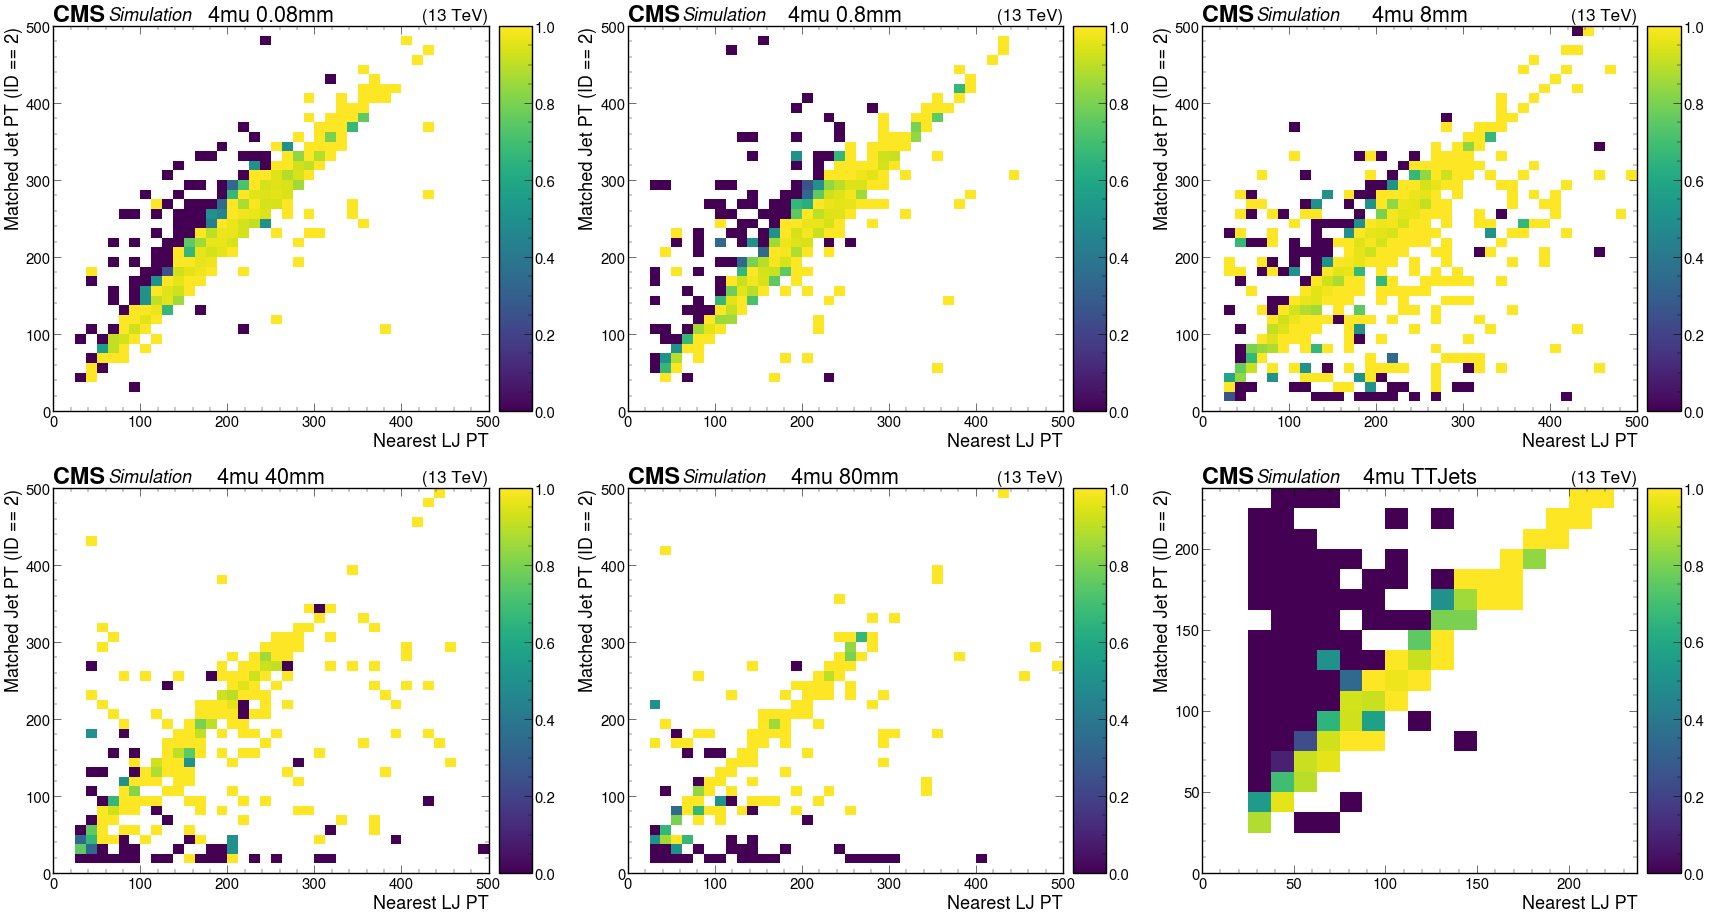

In [21]:
nplots = 3
plt.subplots(2, nplots, figsize=(nplots*14, 22))

plt.subplot(2, nplots, 1)
utilities.plot(eff_hist_sig1_2_4mu)
plt.title("4mu 0.08mm")

plt.subplot(2, nplots, 2)
utilities.plot(eff_hist_sig2_2_4mu)
plt.title("4mu 0.8mm")

plt.subplot(2, nplots, 3)
utilities.plot(eff_hist_sig3_2_4mu)
plt.title("4mu 8mm")

plt.subplot(2, nplots, 4)
utilities.plot(eff_hist_sig4_2_4mu)
plt.title("4mu 40mm")

plt.subplot(2, nplots, 5)
utilities.plot(eff_hist_sig5_2_4mu)
plt.title("4mu 80mm")

plt.subplot(2, nplots, 6)
utilities.plot(eff_hist_bkg_2_4mu)
plt.title("4mu TTJets")

Text(0.5, 1.0, '2mu TTJets')

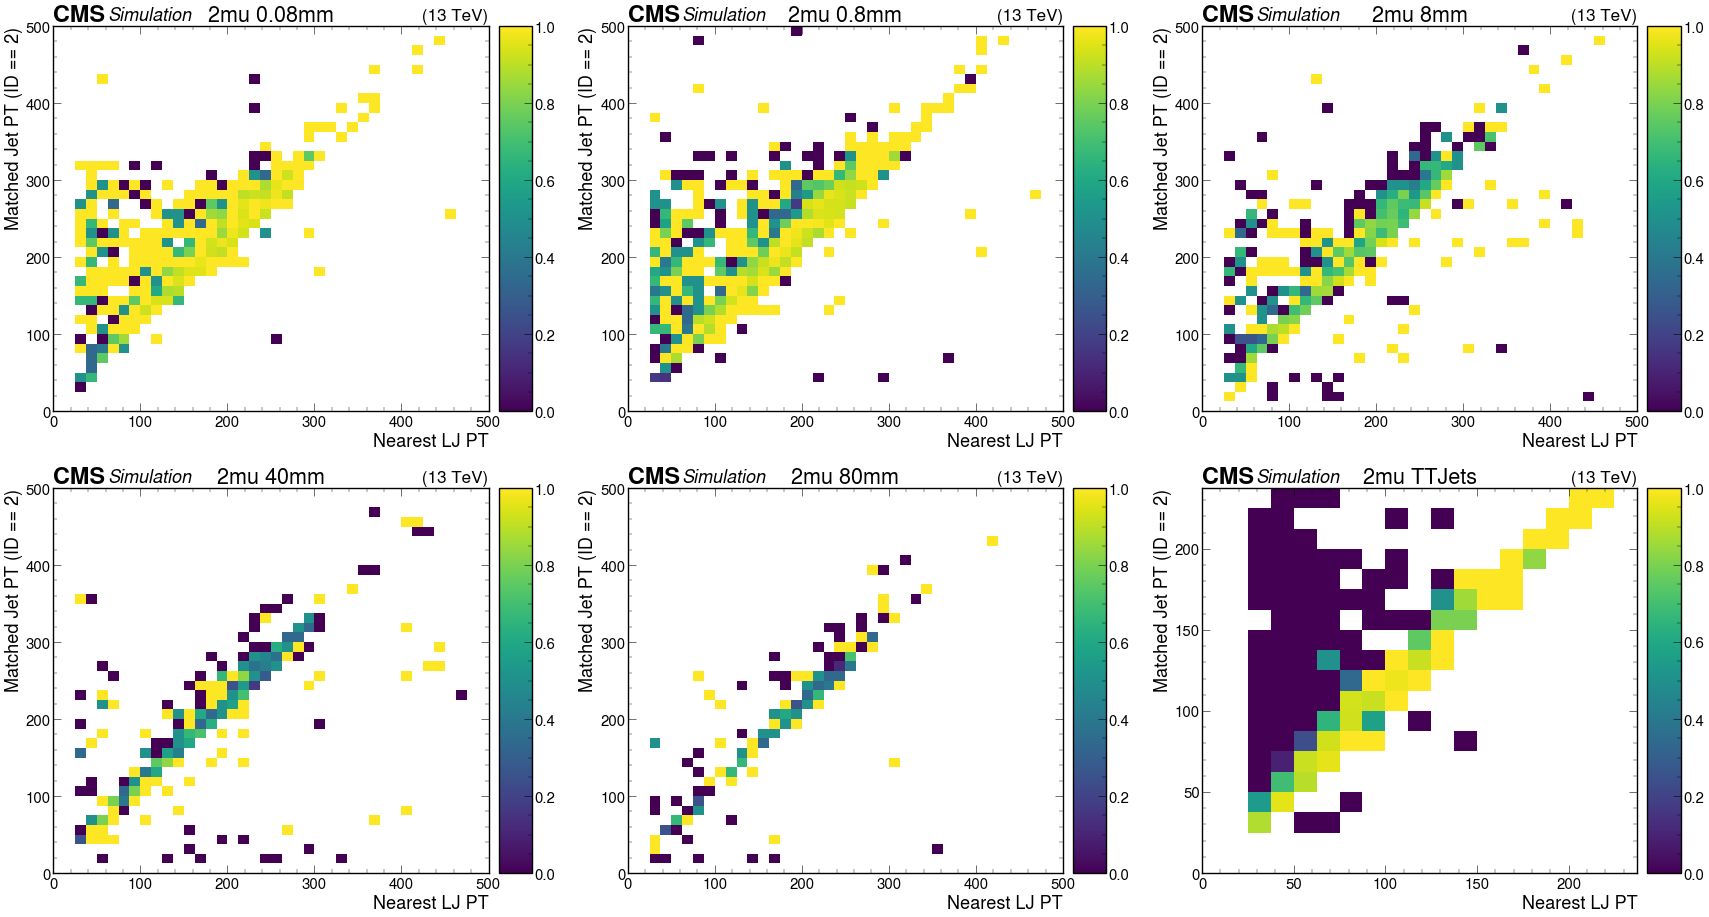

In [22]:
nplots = 3
plt.subplots(2, nplots, figsize=(nplots*14, 22))

plt.subplot(2, nplots, 1)
utilities.plot(eff_hist_sig1_2_2mu)
plt.title("2mu 0.08mm")

plt.subplot(2, nplots, 2)
utilities.plot(eff_hist_sig2_2_2mu)
plt.title("2mu 0.8mm")

plt.subplot(2, nplots, 3)
utilities.plot(eff_hist_sig3_2_2mu)
plt.title("2mu 8mm")

plt.subplot(2, nplots, 4)
utilities.plot(eff_hist_sig4_2_2mu)
plt.title("2mu 40mm")

plt.subplot(2, nplots, 5)
utilities.plot(eff_hist_sig5_2_2mu)
plt.title("2mu 80mm")

plt.subplot(2, nplots, 6)
utilities.plot(eff_hist_bkg_2_2mu)
plt.title("2mu TTJets")

In [23]:
eff_hist_bkg_6_4mu, errors_bkg_6_4mu = utilities.get_eff_hist(BKG_4mu["LJ_matchedjet_PT6"]['base',:240j,:240j], BKG_4mu["LJ_matchedjet_PT"]['base',:240j,:240j])
eff_hist_sig1_6_4mu, errors_sig1_6_4mu = utilities.get_eff_hist(SIG_1_4mu["LJ_matchedjet_PT6"]['base',:,:], SIG_1_4mu["LJ_matchedjet_PT"]['base',:,:])
eff_hist_sig2_6_4mu, errors_sig2_6_4mu = utilities.get_eff_hist(SIG_2_4mu["LJ_matchedjet_PT6"]['base',:,:], SIG_2_4mu["LJ_matchedjet_PT"]['base',:,:])
eff_hist_sig3_6_4mu, errors_sig3_6_4mu = utilities.get_eff_hist(SIG_3_4mu["LJ_matchedjet_PT6"]['base',:,:], SIG_3_4mu["LJ_matchedjet_PT"]['base',:,:])
eff_hist_sig4_6_4mu, errors_sig4_6_4mu = utilities.get_eff_hist(SIG_4_4mu["LJ_matchedjet_PT6"]['base',:,:], SIG_4_4mu["LJ_matchedjet_PT"]['base',:,:])
eff_hist_sig5_6_4mu, errors_sig5_6_4mu = utilities.get_eff_hist(SIG_5_4mu["LJ_matchedjet_PT6"]['base',:,:], SIG_5_4mu["LJ_matchedjet_PT"]['base',:,:])

eff_hist_bkg_6_2mu, errors_bkg_6_2mu = utilities.get_eff_hist(BKG_2mu["LJ_matchedjet_PT6"]['base',:240j,:240j], BKG_2mu["LJ_matchedjet_PT"]['base',:240j,:240j])
eff_hist_sig1_6_2mu, errors_sig1_6_2mu = utilities.get_eff_hist(SIG_1_2mu["LJ_matchedjet_PT6"]['base',:,:], SIG_1_2mu["LJ_matchedjet_PT"]['base',:,:])
eff_hist_sig2_6_2mu, errors_sig2_6_2mu = utilities.get_eff_hist(SIG_2_2mu["LJ_matchedjet_PT6"]['base',:,:], SIG_2_2mu["LJ_matchedjet_PT"]['base',:,:])
eff_hist_sig3_6_2mu, errors_sig3_6_2mu = utilities.get_eff_hist(SIG_3_2mu["LJ_matchedjet_PT6"]['base',:,:], SIG_3_2mu["LJ_matchedjet_PT"]['base',:,:])
eff_hist_sig4_6_2mu, errors_sig4_6_2mu = utilities.get_eff_hist(SIG_4_2mu["LJ_matchedjet_PT6"]['base',:,:], SIG_4_2mu["LJ_matchedjet_PT"]['base',:,:])
eff_hist_sig5_6_2mu, errors_sig5_6_2mu = utilities.get_eff_hist(SIG_5_2mu["LJ_matchedjet_PT6"]['base',:,:], SIG_5_2mu["LJ_matchedjet_PT"]['base',:,:])

Text(0.5, 1.0, '4mu TTJets')

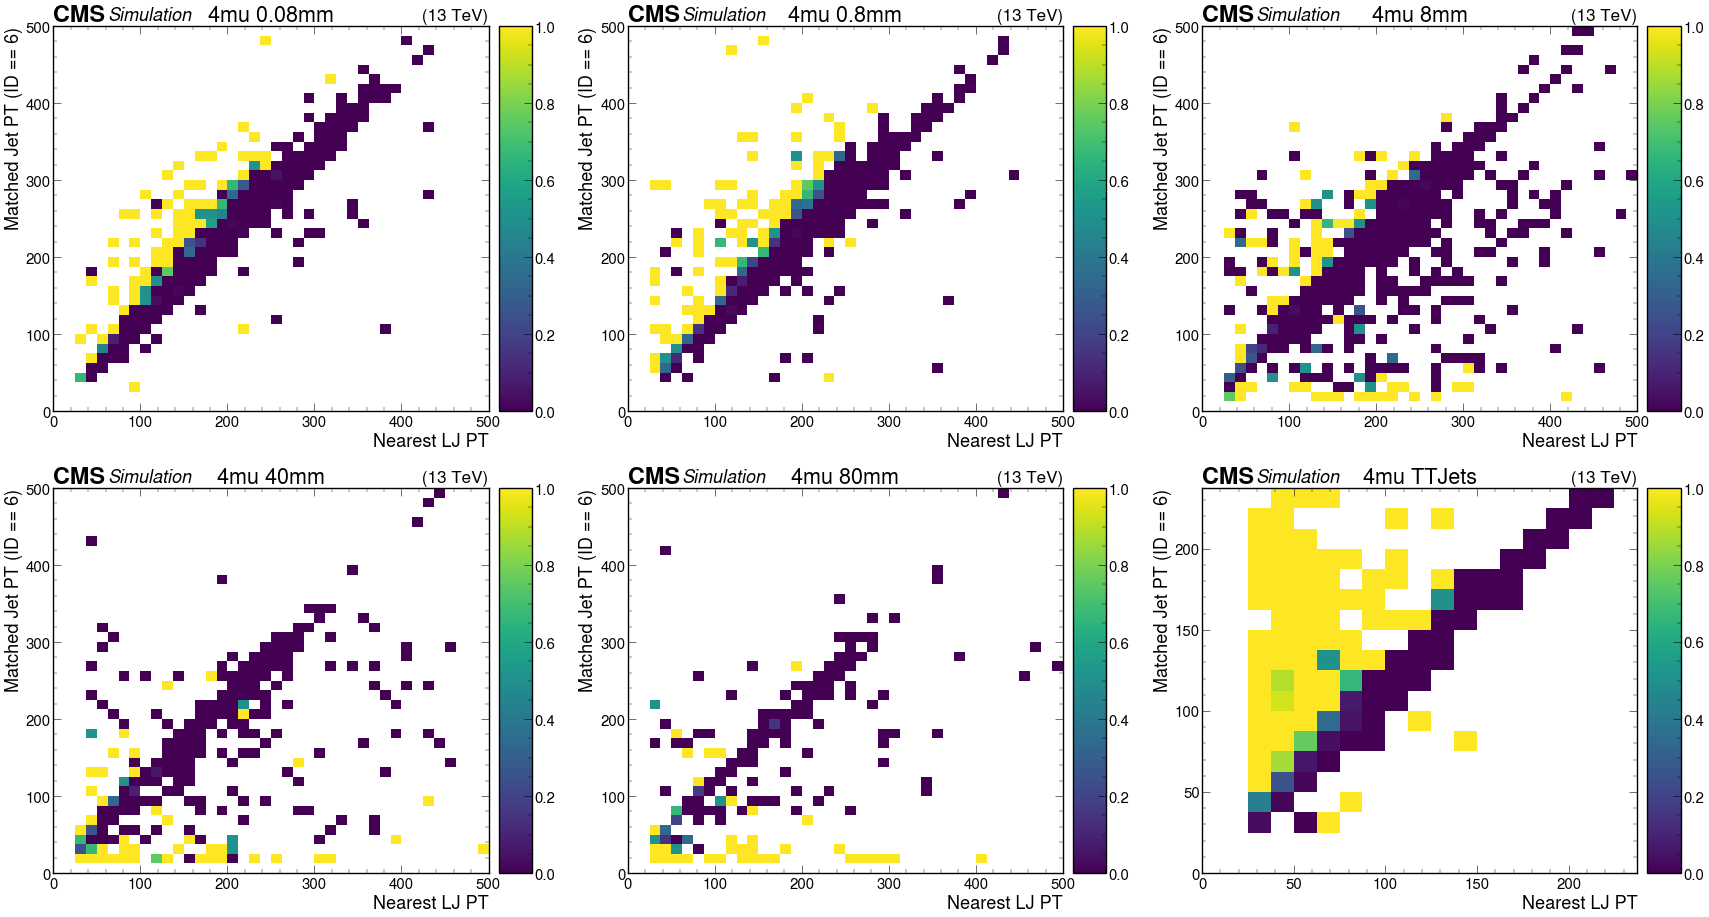

In [24]:
nplots = 3
plt.subplots(2, nplots, figsize=(nplots*14, 22))

plt.subplot(2, nplots, 1)
utilities.plot(eff_hist_sig1_6_4mu)
plt.title("4mu 0.08mm")

plt.subplot(2, nplots, 2)
utilities.plot(eff_hist_sig2_6_4mu)
plt.title("4mu 0.8mm")

plt.subplot(2, nplots, 3)
utilities.plot(eff_hist_sig3_6_4mu)
plt.title("4mu 8mm")

plt.subplot(2, nplots, 4)
utilities.plot(eff_hist_sig4_6_4mu)
plt.title("4mu 40mm")

plt.subplot(2, nplots, 5)
utilities.plot(eff_hist_sig5_6_4mu)
plt.title("4mu 80mm")

plt.subplot(2, nplots, 6)
utilities.plot(eff_hist_bkg_6_4mu)
plt.title("4mu TTJets")

Text(0.5, 1.0, '2mu TTJets')

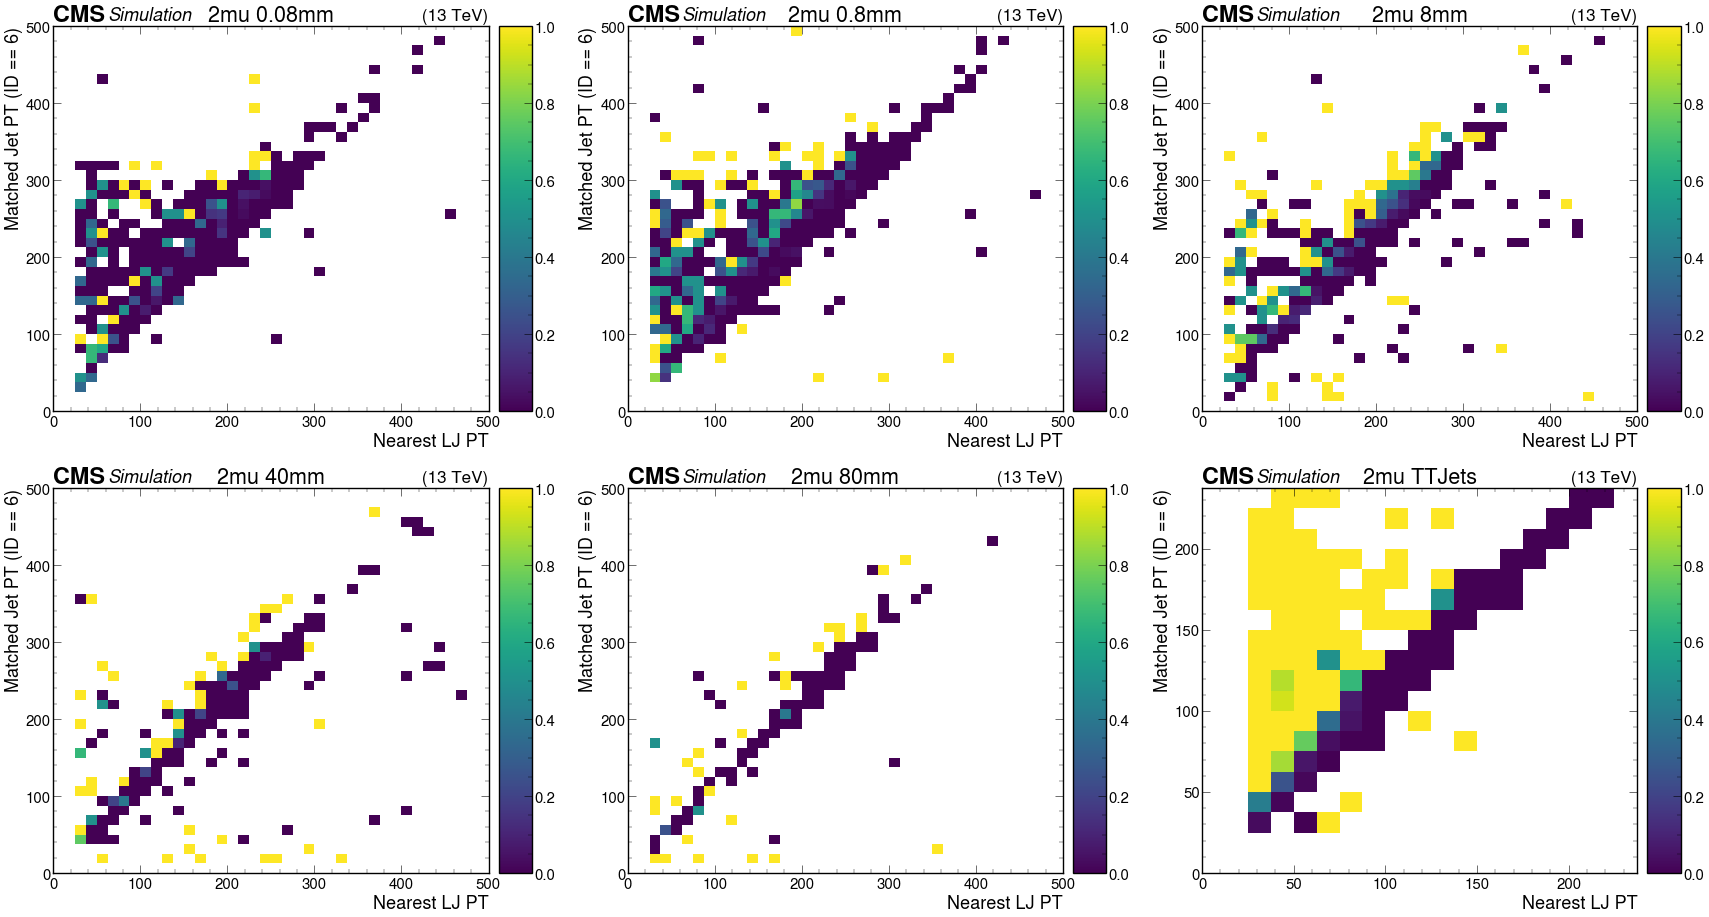

In [25]:
nplots = 3
plt.subplots(2, nplots, figsize=(nplots*14, 22))

plt.subplot(2, nplots, 1)
utilities.plot(eff_hist_sig1_6_2mu)
plt.title("2mu 0.08mm")

plt.subplot(2, nplots, 2)
utilities.plot(eff_hist_sig2_6_2mu)
plt.title("2mu 0.8mm")

plt.subplot(2, nplots, 3)
utilities.plot(eff_hist_sig3_6_2mu)
plt.title("2mu 8mm")

plt.subplot(2, nplots, 4)
utilities.plot(eff_hist_sig4_6_2mu)
plt.title("2mu 40mm")

plt.subplot(2, nplots, 5)
utilities.plot(eff_hist_sig5_6_2mu)
plt.title("2mu 80mm")

plt.subplot(2, nplots, 6)
utilities.plot(eff_hist_bkg_6_2mu)
plt.title("2mu TTJets")

In [16]:
for sample in samples_4mu:
    print(sample, "total matched jet", out_4mu[sample]['counters']['0.4']['base']['Total Matched jet'])
    print(sample, "matched jet ID 0", out_4mu[sample]['counters']['0.4']['base']['Total Matched jet0'])
    print(sample, "matched jet ID 2", out_4mu[sample]['counters']['0.4']['base']['Total Matched jet2'])
    print(sample, "matched jet ID 6", out_4mu[sample]['counters']['0.4']['base']['Total Matched jet6'])
    print(sample, "Jet ID 0 + 2 + 6", out_4mu[sample]['counters']['0.4']['base']['Total Matched jet0'] + 
          out_4mu[sample]['counters']['0.4']['base']['Total Matched jet2'] + out_4mu[sample]['counters']['0.4']['base']['Total Matched jet6'])
    print("")

TTJets total matched jet 1301
TTJets matched jet ID 0 45
TTJets matched jet ID 2 778
TTJets matched jet ID 6 478
TTJets Jet ID 0 + 2 + 6 1301

4mu_500GeV_5p0GeV_0p08mm total matched jet 3971
4mu_500GeV_5p0GeV_0p08mm matched jet ID 0 184
4mu_500GeV_5p0GeV_0p08mm matched jet ID 2 3665
4mu_500GeV_5p0GeV_0p08mm matched jet ID 6 122
4mu_500GeV_5p0GeV_0p08mm Jet ID 0 + 2 + 6 3971

4mu_500GeV_5p0GeV_0p8mm total matched jet 3948
4mu_500GeV_5p0GeV_0p8mm matched jet ID 0 179
4mu_500GeV_5p0GeV_0p8mm matched jet ID 2 3622
4mu_500GeV_5p0GeV_0p8mm matched jet ID 6 147
4mu_500GeV_5p0GeV_0p8mm Jet ID 0 + 2 + 6 3948

4mu_500GeV_5p0GeV_8p0mm total matched jet 3111
4mu_500GeV_5p0GeV_8p0mm matched jet ID 0 138
4mu_500GeV_5p0GeV_8p0mm matched jet ID 2 2840
4mu_500GeV_5p0GeV_8p0mm matched jet ID 6 133
4mu_500GeV_5p0GeV_8p0mm Jet ID 0 + 2 + 6 3111

4mu_500GeV_5p0GeV_40p0mm total matched jet 802
4mu_500GeV_5p0GeV_40p0mm matched jet ID 0 28
4mu_500GeV_5p0GeV_40p0mm matched jet ID 2 684
4mu_500GeV_5p0GeV_40p0mm

In [17]:
for sample in samples_2mu:
    print(sample, "total matched jet", out_2mu[sample]['counters']['0.4']['base']['Total Matched jet'])
    print(sample, "matched jet ID 0", out_2mu[sample]['counters']['0.4']['base']['Total Matched jet0'])
    print(sample, "matched jet ID 2", out_2mu[sample]['counters']['0.4']['base']['Total Matched jet2'])
    print(sample, "matched jet ID 6", out_2mu[sample]['counters']['0.4']['base']['Total Matched jet6'])
    print(sample, "Jet ID 0 + 2 + 6", out_2mu[sample]['counters']['0.4']['base']['Total Matched jet0'] + 
          out_2mu[sample]['counters']['0.4']['base']['Total Matched jet2'] + out_2mu[sample]['counters']['0.4']['base']['Total Matched jet6'])
    print("")

TTJets total matched jet 1301
TTJets matched jet ID 0 45
TTJets matched jet ID 2 778
TTJets matched jet ID 6 478
TTJets Jet ID 0 + 2 + 6 1301

2mu2e_500GeV_5p0GeV_0p08mm total matched jet 1550
2mu2e_500GeV_5p0GeV_0p08mm matched jet ID 0 54
2mu2e_500GeV_5p0GeV_0p08mm matched jet ID 2 1408
2mu2e_500GeV_5p0GeV_0p08mm matched jet ID 6 88
2mu2e_500GeV_5p0GeV_0p08mm Jet ID 0 + 2 + 6 1550

2mu2e_500GeV_5p0GeV_0p8mm total matched jet 2378
2mu2e_500GeV_5p0GeV_0p8mm matched jet ID 0 105
2mu2e_500GeV_5p0GeV_0p8mm matched jet ID 2 2066
2mu2e_500GeV_5p0GeV_0p8mm matched jet ID 6 207
2mu2e_500GeV_5p0GeV_0p8mm Jet ID 0 + 2 + 6 2378

2mu2e_500GeV_5p0GeV_8p0mm total matched jet 1132
2mu2e_500GeV_5p0GeV_8p0mm matched jet ID 0 172
2mu2e_500GeV_5p0GeV_8p0mm matched jet ID 2 772
2mu2e_500GeV_5p0GeV_8p0mm matched jet ID 6 188
2mu2e_500GeV_5p0GeV_8p0mm Jet ID 0 + 2 + 6 1132

2mu2e_500GeV_5p0GeV_40p0mm total matched jet 418
2mu2e_500GeV_5p0GeV_40p0mm matched jet ID 0 132
2mu2e_500GeV_5p0GeV_40p0mm matched jet